## Simulation

In [19]:
%load_ext autoreload
%autoreload 2

from entities.simulation import Simulation

"""
The car spawn policy determines the directions in which cars 
will spawn and the duration for which they will spawn in that direction.
"""
car_spwan_policy = [
     ('all_directions', 5),    # 5 minutes    
     ('no_cars', 1),           # 1 minute  
     ('up_down', 2),           # 2 minutes
     ('left_right', 2),        # 2 minutes
     ('all_directions', 5)     # 5 minutes 
]

simulation = Simulation(
     name="Ambient Test",
     car_spawn_frequency=1.5,  # Car every 1.5 seconds
     simulation_duration=900,  # 15 minutes
     car_spwan_policy=car_spwan_policy,
)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
simulation.run('ft')

In [21]:
simulation.run('mdp')

## Load data

In [1]:
import pandas as pd

# Load the cumulative waiting times from the csv files
cumulative_waiting_times_mdp = pd.read_csv('data/cumulative_waitingtimes_mdp.csv', index_col=0, names=['cumulative_waiting_time'])
cumulative_waiting_times_ft = pd.read_csv('data/cumulative_waitingtimes_ft.csv', index_col=0, names=['cumulative_waiting_time'])

# Load the number of stopped cars
n_stopped_cars_mdp = pd.read_csv('data/stopped_cars_mdp.csv', index_col=0, names=['stopped_cars'])['stopped_cars']
n_stopped_cars_ft = pd.read_csv('data/stopped_cars_ft.csv', index_col=0, names=['stopped_cars'])['stopped_cars']

## Plot results

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('seaborn-v0_8-pastel')

In [9]:
plot_green = "#6BC8A3"
plot_yellow = "#FFD84C"
plot_red = "#FF8B60"

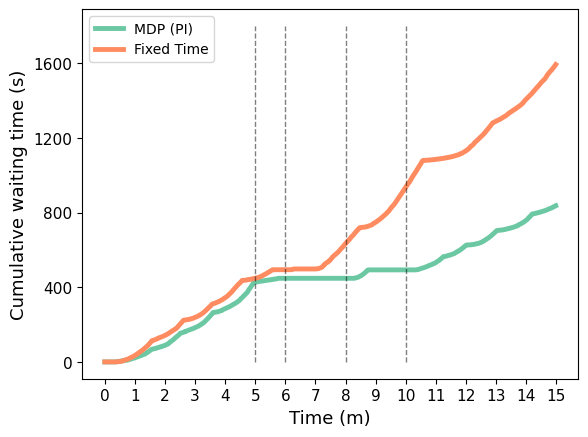

In [23]:
## The Fixed Time agent makes people arrive late!

plt.plot(range(len(cumulative_waiting_times_mdp)), cumulative_waiting_times_mdp, label='MDP (PI)', color=plot_green, linewidth=3.5)
plt.plot(range(len(cumulative_waiting_times_ft)), cumulative_waiting_times_ft, label='Fixed Time', color=plot_red, linewidth=3.5)

plt.xlabel('Time (m)', fontsize=13)
plt.ylabel('Cumulative waiting time (s)', fontsize=13)

ax = plt.gca()
ax.set_yticks([0, 400, 800, 1200, 1600])
ax.set_xticks([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840, 900])

ax.set_xticklabels([f'{int(x)//60}' for x in ax.get_xticks()], fontsize=11)
ax.set_yticklabels([f'{y}' for y in ax.get_yticks()], fontsize=11)

plt.vlines(300, 0, 1800, color='black', linestyle='--', alpha=0.5, linewidth=1)
plt.vlines(360, 0, 1800, color='black', linestyle='--', alpha=0.5, linewidth=1)
plt.vlines(480, 0, 1800, color='black', linestyle='--', alpha=0.5, linewidth=1)
plt.vlines(600, 0, 1800, color='black', linestyle='--', alpha=0.5, linewidth=1)

plt.legend(prop={'size': 10}, loc='upper left')

plt.show()

C:\Users\sandr\AppData\Local\Temp\ipykernel_20016\3026541672.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)


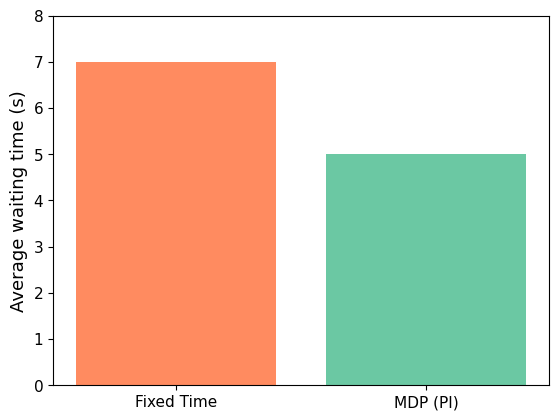

In [58]:
# Stick plot of average waiting times
plt.bar(['Fixed Time', 'MDP (PI)'], 
        [cumulative_waiting_times_ft['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_ft.values[0], cumulative_waiting_times_mdp['cumulative_waiting_time'].tail(1).values[0]//n_stopped_cars_mdp.values[0]],
        color=[plot_red, plot_green])

plt.ylabel('Average waiting time (s)', fontsize=13)
ax = plt.gca()
ax.set_xticklabels(['Fixed Time', 'MDP (PI)'], fontsize=11)
ax.set_yticks(range(0, 9))
ax.set_yticklabels([f'{y}' for y in range(0, 9)], fontsize=11)    
plt.show()

## TODO - Queue lengths plots

In [ ]:
## Queues might become annoying with a Fixed Time policy!

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(range(len(queue_lengths['mdp'])), queue_lengths['mdp'], label='MDP (PI)')
axs[0].plot(range(len(queue_lengths['ft'])), queue_lengths['ft'], label='Fixed Time')

axs[0].set_xlabel('Number of queues (sorted by time)', fontsize=15)
axs[0].set_ylabel('Queue length', fontsize=15)

axs[0].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=6))

axs[0].text(0.5*max(axs[0].get_xticks()), -0.3*axs[0].get_yticks()[3], f'Number of cars that stopped with MDP (PI) policy: {n_stopped_cars["mdp"]}', horizontalalignment='center', fontsize = 10, fontstyle = 'italic')

axs[0].vlines(len(queue_lengths['mdp'])-1, 0, queue_lengths['mdp'][-1], color='#008FD5', linestyle='--', linewidth=2)
axs[0].text(len(queue_lengths['mdp'])-1, -0.5, len(queue_lengths['mdp'])-1, color='#008FD5', fontsize=12, fontstyle='italic')

axs[0].vlines(len(queue_lengths['ft'])-1, 0, queue_lengths['ft'][-1], color='#FF2700', linestyle='--', linewidth=2)
axs[0].text(len(queue_lengths['ft'])-1, -0.5, len(queue_lengths['ft'])-1, color='#FF2700', fontsize=12, fontstyle='italic')

axs[1].plot(range(len(queue_lengths['mdp'])), sorted(queue_lengths['mdp']), label='MDP (PI)')
axs[1].plot(range(len(queue_lengths['ft'])), sorted(queue_lengths['ft']), label='Fixed Time')

axs[1].set_xlabel('Number of queues (sorted by length)', fontsize=15)

axs[1].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[1].yaxis.tick_right()
axs[1].xaxis.set_major_locator(MaxNLocator(nbins=6))

axs[1].legend(prop={'size': 14}, bbox_to_anchor=(1.4, 0.5))

axs[1].text(0.5*max(axs[1].get_xticks()), -0.3*axs[1].get_yticks()[3], f'Number of cars that stopped with Fixed Time policy: {n_stopped_cars["ft"]}', horizontalalignment='center', fontsize = 10, fontstyle = 'italic')

axs[1].vlines(len(queue_lengths['mdp'])-1, 0, sorted(queue_lengths['mdp'])[-1], color='#008FD5', linestyle='--', linewidth=2)
axs[1].text(len(queue_lengths['mdp'])-1, -0.5, len(queue_lengths['mdp'])-1, color='#008FD5', fontsize=12, fontstyle='italic')

axs[1].vlines(len(queue_lengths['ft'])-1, 0, sorted(queue_lengths['ft'])[-1], color='#FF2700', linestyle='--', linewidth=2)
axs[1].text(len(queue_lengths['ft'])-1, -0.5, len(queue_lengths['ft'])-1, color='#FF2700', fontsize=12, fontstyle='italic')

plt.tight_layout()

plt.show()